# Deterministic SIR

In [1]:
import matplotlib.pyplot as plt

In [2]:
def det_sir(S0, I0, R0, beta, gamma, n_days):
    n_population = S0 + I0 + R0
    S = [S0] * n_days
    I = [I0] * n_days
    R = [R0] * n_days
    for i in range(n_days-1):
        S[i+1] = S[i] - beta * S[i] * I[i] / n_population
        I[i+1] = I[i] + beta * S[i] * I[i] / n_population - gamma * I[i]
        R[i+1] = R[i] + gamma * I[i]
    return S, I, R

S, I, R = det_sir(S0=999, I0=1, R0=0, beta=0.3, gamma=0.05, n_days=100)

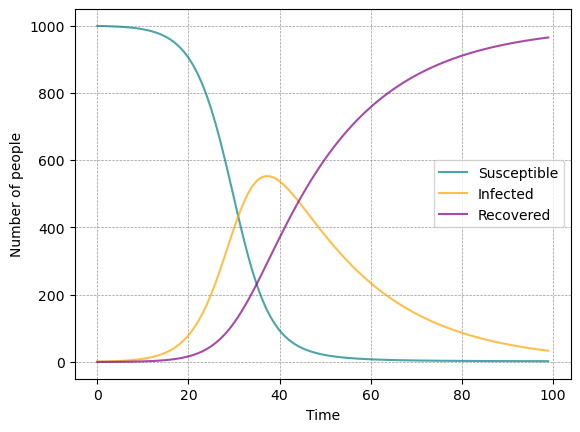

In [3]:
fig, ax = plt.subplots()
ax.plot(S, color='teal', alpha=0.7, label='Susceptible')
ax.plot(I, color='orange', alpha =0.7, label='Infected')
ax.plot(R, color='purple', alpha=0.7, label='Recovered')
ax.set_xlabel('Time')
ax.set_ylabel('Number of people')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.legend()

In [4]:
import numpy as np
betas = np.arange(0, 0.5, 0.005)
max_size_beta = []
for b in betas:
    S, I, R = det_sir(S0=999, I0=1, R0=0, beta=b, gamma=0.05, n_days=100)
    max_size_beta.append(max(I))

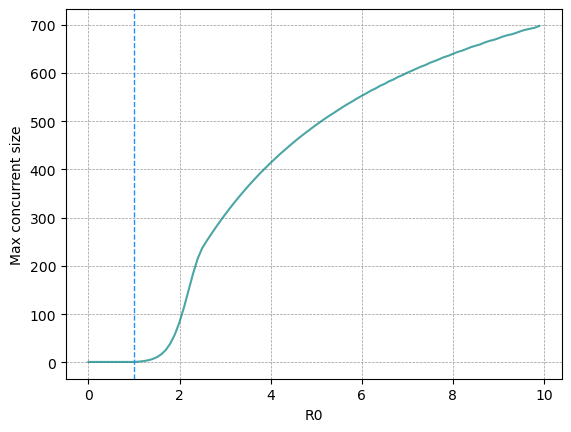

In [5]:
fig, ax = plt.subplots()
ax.plot([b/0.05 for b in betas], max_size_beta, color='teal', alpha=0.7)
ax.axvline(x=1, color='dodgerblue', linestyle='--', linewidth=1)
ax.set_ylabel('Max concurrent size')
ax.set_xlabel('R0')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)


In [6]:
import random
random.uniform(0,1)

0.5411085850005367

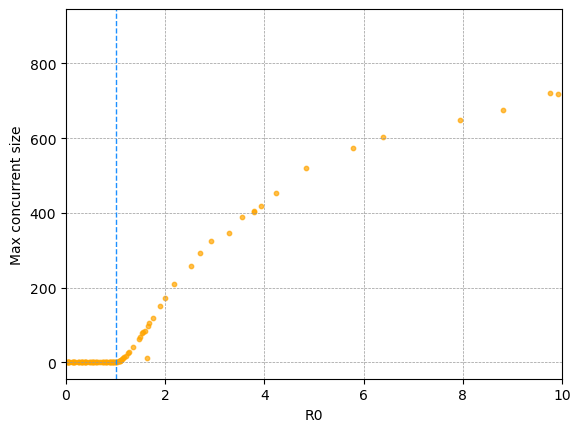

In [7]:
fig, ax = plt.subplots()
ax.axvline(x=1, color='dodgerblue', linestyle='--', linewidth=1)
ax.set_ylabel('Max concurrent size')
ax.set_xlabel('R0')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.set_xlim(0, 10)
for i in range(100):
    beta = random.uniform(0, 1)
    gamma = random.uniform(0, 1)
    S, I, R = det_sir(S0=999, I0=1, R0=0, beta=beta, gamma=gamma, n_days=100)
    max_size = max(I)
    R0 = beta / gamma
    ax.scatter(R0, max_size, color='orange', alpha=0.7, s=10)

# Stochastic SIR 

In [8]:
def stochastic_sir(S0, I0, R0, beta, gamma, n_days): 
    n_population = S0 + I0 + R0
    S = [S0] * n_days
    I = [I0] * n_days
    R = [R0] * n_days

    for i in range(n_days-1):
        Lambda = beta * I[i]/n_population
        
        S_out = np.random.binomial(S[i], Lambda)
        I_in = S_out
        I_out = np.random.binomial(I[i], gamma)
        R_in = I_out

        S[i+1] = S[i] - S_out
        I[i+1] = I[i] + I_in - I_out
        R[i+1] = R[i] + R_in
    return S, I, R


In [24]:
S, I, R = det_sir(S0=990, I0=10, R0=0, beta=0.3, gamma=0.05, n_days=100)


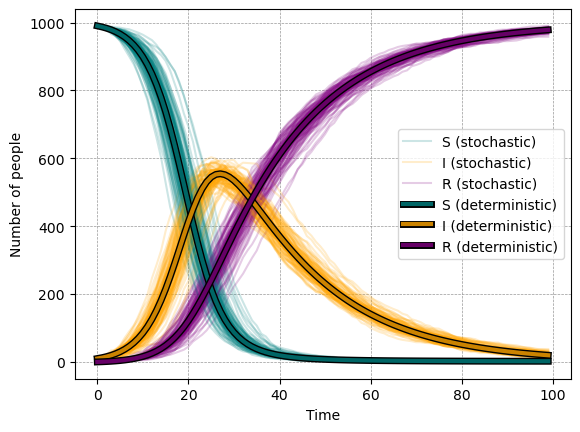

In [ ]:
fig, ax = plt.subplots()

for i in range(100):
    S_sto, I_sto, R_sto = stochastic_sir(S0=990, I0=10, R0=0, beta=0.3, gamma=0.05, n_days=100)
    if i ==0:
        ax.plot(S_sto, color='teal', alpha=0.2, label='S (stochastic)')
        ax.plot(I_sto, color='orange', alpha =0.2, label='I (stochastic)')
        ax.plot(R_sto, color='purple', alpha=0.2, label='R (stochastic)')
    else:
        ax.plot(S_sto, color='teal', alpha=0.2)
        ax.plot(I_sto, color='orange', alpha =0.2)
        ax.plot(R_sto, color='purple', alpha=0.2)
    
import matplotlib.patheffects as pe
ax.plot(S, color='teal', alpha=0.8, label='S (deterministic)', linewidth=3, path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.plot(I, color='orange', alpha =0.8, label='I (deterministic)', linewidth =3, path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.plot(R, color='purple', alpha=0.8, label='R (deterministic)', linewidth =3, path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])

ax.set_xlabel('Time')
ax.set_ylabel('Number of people')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.legend()

In [52]:
import pandas as pd
sir_sto = pd.DataFrame(columns=['t', 'S', 'I', 'R'])

for i in range(100):
    S_sto, I_sto, R_sto = stochastic_sir(S0=990, I0=10, R0=0, beta=0.3, gamma=0.05, n_days=100)
    df = pd.DataFrame({'t': range(0,100),
                       'S': S_sto, 
                       'I': I_sto, 
                       'R': R_sto})
    sir_sto = pd.concat([sir_sto, df], ignore_index=True)
     

In [80]:
sir_sto[['S', 'I', 'R']] = sir_sto[['S', 'I', 'R']].apply(pd.to_numeric)
quantiles = sir_sto.groupby('t').describe(percentiles=[.05, .5, .95])
# quantiles

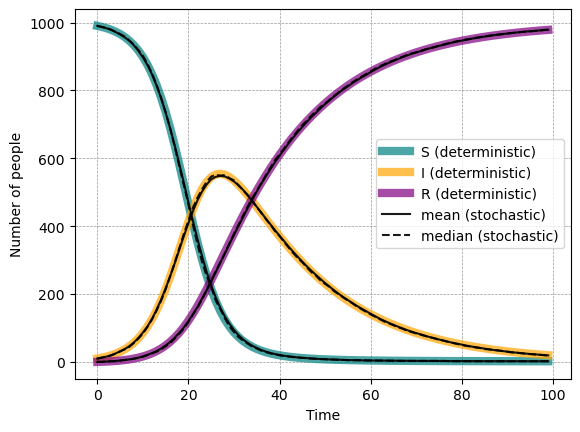

In [79]:
fig, ax = plt.subplots()

ax.plot(S, color='teal', alpha=0.7, label='S (deterministic)', linewidth=6)
ax.plot(I, color='orange', alpha=0.7, label='I (deterministic)', linewidth=6)
ax.plot(R, color='purple', alpha=0.7, label='R (deterministic)', linewidth=6)

ax.plot(quantiles['S']['mean'], 'black', alpha=0.9, label = 'mean (stochastic)')
ax.plot(quantiles['I']['mean'], 'black', alpha=0.9)
ax.plot(quantiles['R']['mean'], 'black', alpha=0.9)

ax.plot(quantiles['S']['50%'], 'black', alpha=0.9, linestyle='--', label = 'median (stochastic)')
ax.plot(quantiles['I']['50%'], 'black', alpha=0.9, linestyle='--')
ax.plot(quantiles['R']['50%'], 'black', alpha=0.9, linestyle='--')

ax.set_xlabel('Time')
ax.set_ylabel('Number of people')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.legend()

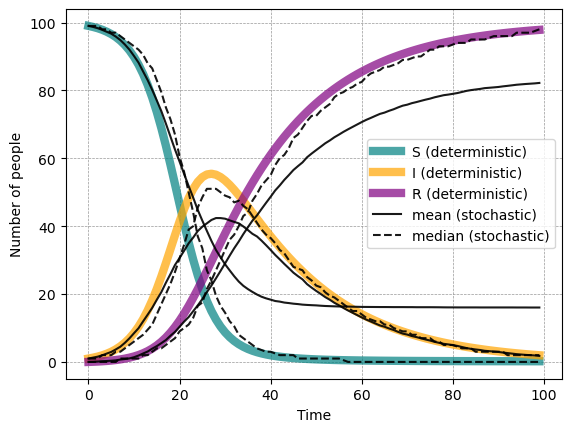

In [90]:
S, I, R = det_sir(S0=99, I0=1, R0=0, beta=0.3, gamma=0.05, n_days=100)
sir_sto = pd.DataFrame(columns=['t', 'S', 'I', 'R'])

for i in range(100):
    S_sto, I_sto, R_sto = stochastic_sir(S0=99, I0=1, R0=0, beta=0.3, gamma=0.05, n_days=100)
    df = pd.DataFrame({'t': range(0,100),
                       'S': S_sto, 
                       'I': I_sto, 
                       'R': R_sto})
    sir_sto = pd.concat([sir_sto, df], ignore_index=True)

sir_sto[['S', 'I', 'R']] = sir_sto[['S', 'I', 'R']].apply(pd.to_numeric)
quantiles = sir_sto.groupby('t').describe(percentiles=[.05, .5, .95])

fig, ax = plt.subplots()

ax.plot(S, color='teal', alpha=0.7, label='S (deterministic)', linewidth=6)
ax.plot(I, color='orange', alpha=0.7, label='I (deterministic)', linewidth=6)
ax.plot(R, color='purple', alpha=0.7, label='R (deterministic)', linewidth=6)

ax.plot(quantiles['S']['mean'], 'black', alpha=0.9, label = 'mean (stochastic)')
ax.plot(quantiles['I']['mean'], 'black', alpha=0.9)
ax.plot(quantiles['R']['mean'], 'black', alpha=0.9)

ax.plot(quantiles['S']['50%'], 'black', alpha=0.9, linestyle='--', label = 'median (stochastic)')
ax.plot(quantiles['I']['50%'], 'black', alpha=0.9, linestyle='--')
ax.plot(quantiles['R']['50%'], 'black', alpha=0.9, linestyle='--')

ax.set_xlabel('Time')
ax.set_ylabel('Number of people')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.legend()

# Network based model

In [1]:
import networkx as nx

In [2]:
G = nx.erdos_renyi_graph(n=500, p=0.01)

In [ ]:
import networkx as nx
import random

def epidemic_model_network(G, compartments, seed_num, T, transmissions, params):
    """
    Simulate an epidemic model on a networkx graph.

    Parameters:
    -----------
    G : networkx.Graph
        The input graph representing the contact network.
    compartments : dict
        Dictionary where keys are compartment names (e.g., "S", "I", "R") and 
        values are lists to store the number of nodes in each compartment at each timestep.
    seed_num : int
        Number of initial infectious nodes.
    T : int
        Number of timesteps to simulate.
    transmissions : dict
        Dictionary where keys are current statuses (e.g., "S") and values are tuples 
        `(new_status, trans_type, trans_rate_key)`. `trans_type` is either "contagion" 
        or "spontaneous".
    params : dict
        Dictionary mapping parameter names (e.g., "beta", "gamma") to their numerical values.

    Returns:
    --------
    compartments : dict
        Updated dictionary where each key contains a list of counts over time for each compartment.
    all_node_statuses : dict
        Dictionary tracking the status of each node at every time step.
    """
    # Initialize node states
    all_nodes = list(G.nodes())
    node_status = {node: {"status": None, "next_status": None} for node in all_nodes}
    all_node_statuses = {node: ["S"] * T for node in all_nodes}  # Track status for all time steps

    # Initialize compartments (total nodes in each compartment at each timestep)
    for cmpt in compartments.keys():
        compartments[cmpt].append(0)

    # Set all nodes to susceptible 
    for node in all_nodes:
        node_status[node]["status"] = "S"
        compartments["S"][0] += 1

    # Seed infectious nodes
    seed_nodes = random.sample(all_nodes, seed_num)
    for node in seed_nodes:
        node_status[node]["status"] = "I"
        all_node_statuses[node][0] = "I"
        compartments["S"][0] -= 1
        compartments["I"][0] += 1

    # Simulate over timesteps
    for t in range(1, T):
        # Loop over all nodes
        for node in all_nodes:
            current_status = node_status[node]["status"]
            neighbors = list(G.neighbors(node))
            
            # Check if the current status has a transition rule
            if current_status in transmissions:
                new_status, trans_type, trans_rate_key = transmissions[current_status]
                trans_rate = params[trans_rate_key]

                # Contagion-based transitions
                if trans_type == "contagion":
                    for neighbor in neighbors:
                        if node_status[neighbor]["status"] == new_status:
                            if random.uniform(0, 1) < trans_rate:
                                node_status[node]["next_status"] = new_status
                                break

                # Spontaneous transitions
                elif trans_type == "spontaneous":
                    if random.uniform(0, 1) < trans_rate:
                        node_status[node]["next_status"] = new_status

        # Update compartments and node statuses for the current timestep
        for cmpt in compartments.keys():
            compartments[cmpt].append(0)

        for node in all_nodes:
            if node_status[node]["next_status"]:
                node_status[node]["status"] = node_status[node]["next_status"]
                node_status[node]["next_status"] = None
            
            all_node_statuses[node][t] = node_status[node]["status"]  # Track status at time t
            
            # Count the total nodes in each compartment
            compartments[node_status[node]["status"]][t] += 1

    return compartments, all_node_statuses


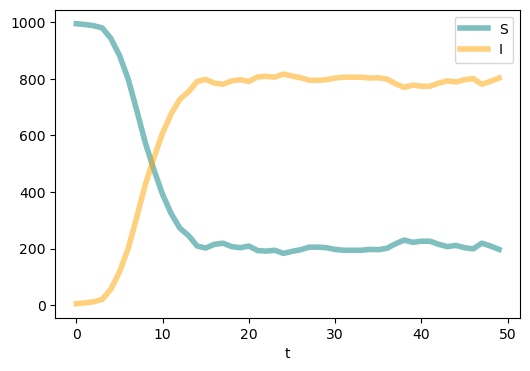

In [31]:
import matplotlib.pyplot as plt
N = 1000
m = 2
G = nx.barabasi_albert_graph(N, m)
seed_num = 5
T = 50
susceptible_compartment = 'S'
infectious_compartment = 'I'

transmissions = {\
                'S' : ('I', 'contagion', 'beta'), \
                'I' : ('S', 'spontaneous', 'mu') \
                }
params = {
         'beta': 0.2,
         'mu'  : 0.1
         }
compartments = {'S':[],
                'I':[]}

compartments, node_status = epidemic_model_network(G, compartments, seed_num, T, transmissions, params)

plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(T), compartments['S'], c='teal',linewidth = 4.0, alpha=0.5, label = 'S') 
plt.plot(range(T), compartments['I'], c='orange',linewidth = 4.0, alpha=0.5, label = 'I') 
plt.xlabel('t')
plt.legend()
plt.show() 

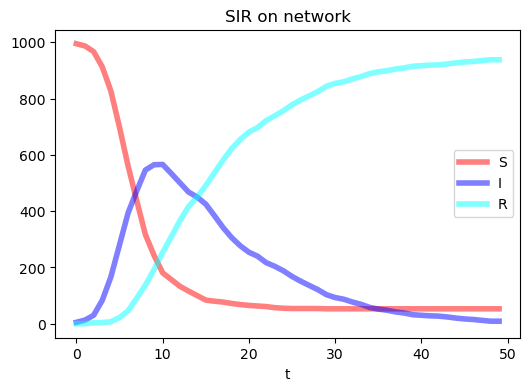

In [33]:
N = 1000
G = nx.barabasi_albert_graph(N, 2)
seed_num = 5
T = 50
susceptible_compartment = 'S'
infectious_compartment = 'I'

transmissions = {\
                'S' : ('I', 'contagion', 'beta'), \
                'I' : ('R', 'spontaneous', 'mu') \
                }
params = {\
         'beta': 0.2,\
          'mu' : 0.1
         }
compartments = {'S':[],
                'I':[],
                'R':[]}

epidemic_model_network(G, compartments, seed_num, T, transmissions, params)

plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(T), compartments['S'], c="Red",linewidth = 4.0, alpha=0.5, label = 'S') 
plt.plot(range(T), compartments['I'], c="Blue",linewidth = 4.0, alpha=0.5, label = 'I')
plt.plot(range(T), compartments['R'], c="Cyan",linewidth = 4.0, alpha=0.5, label = 'R')
plt.xlabel('t')
plt.title('SIR on network')
plt.legend()
plt.show() 

In [35]:
nx.density(Ger)

0.003865865865865866

In [36]:
nx.density(G)

0.003995995995995996

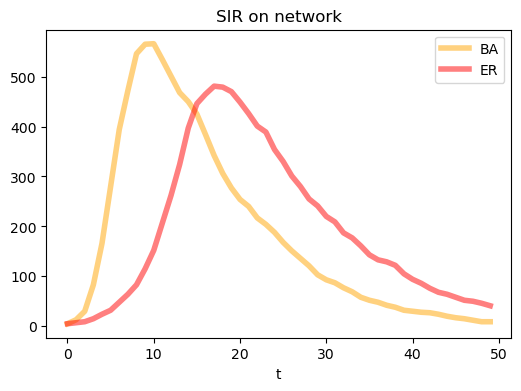

In [34]:
N = 1000
Ger = nx.erdos_renyi_graph(N, 4/N)
seed_num = 5
T = 50
susceptible_compartment = 'S'
infectious_compartment = 'I'

transmissions = {\
                'S' : ('I', 'contagion', 'beta'), \
                'I' : ('R', 'spontaneous', 'mu') \
                }
params = {\
         'beta': 0.2,\
          'mu' : 0.1
         }
compartments_er = {'S':[],
                'I':[],
                'R':[]}

epidemic_model_network(Ger, compartments_er, seed_num, T, transmissions, params)

plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(T), compartments['I'], c="orange",linewidth = 4.0, alpha=0.5, label = 'BA') 
plt.plot(range(T), compartments_er['I'], c="red",linewidth = 4.0, alpha=0.5, label = 'ER')
plt.xlabel('t')
plt.title('SIR on network')
plt.legend()
plt.show() 

# Epidemic spreading on (non-linear) preferential attachment networks

In [41]:
import numpy as np
def nonlinear_preferential_attachment(n, m, alpha):
    """
    Generate a scale-free network using nonlinear preferential attachment.
    
    Parameters:
    n (int): Number of nodes in the final network.
    m (int): Number of edges each new node attaches to existing nodes.
    alpha (float): Exponent controlling the preferential attachment probability.
    
    Returns:
    G (networkx.Graph): Generated graph.
    """
    if m < 1 or m >= n:
        raise ValueError("m must be at least 1 and less than n")
    
    G = nx.Graph()
    G.add_nodes_from(range(m))  # Start with an initial fully connected network
    for i in range(m):
        for j in range(i):
            G.add_edge(i, j)
    
    for new_node in range(m, n):
        G.add_node(new_node)
        
        degrees = np.array([G.degree(node) for node in G.nodes()])
        
        # Avoid zero-degree nodes being ignored when alpha is negative
        adjusted_degrees = np.array([float(degree) ** alpha if degree != 0 else 0 for degree in degrees])
        # adjusted_degrees = np.where(degrees > 0, degrees.astype(float) ** alpha, 0)
        probabilities = adjusted_degrees / np.sum(adjusted_degrees)
        
        targets = np.random.choice(G.nodes(), size=m, replace=False, p=probabilities)
        G.add_edges_from((new_node, target) for target in targets)
    
    return G

In [54]:
alphas = range(-15,5)
pa_graphs = [nonlinear_preferential_attachment(1000, 3, a) for a in alphas]

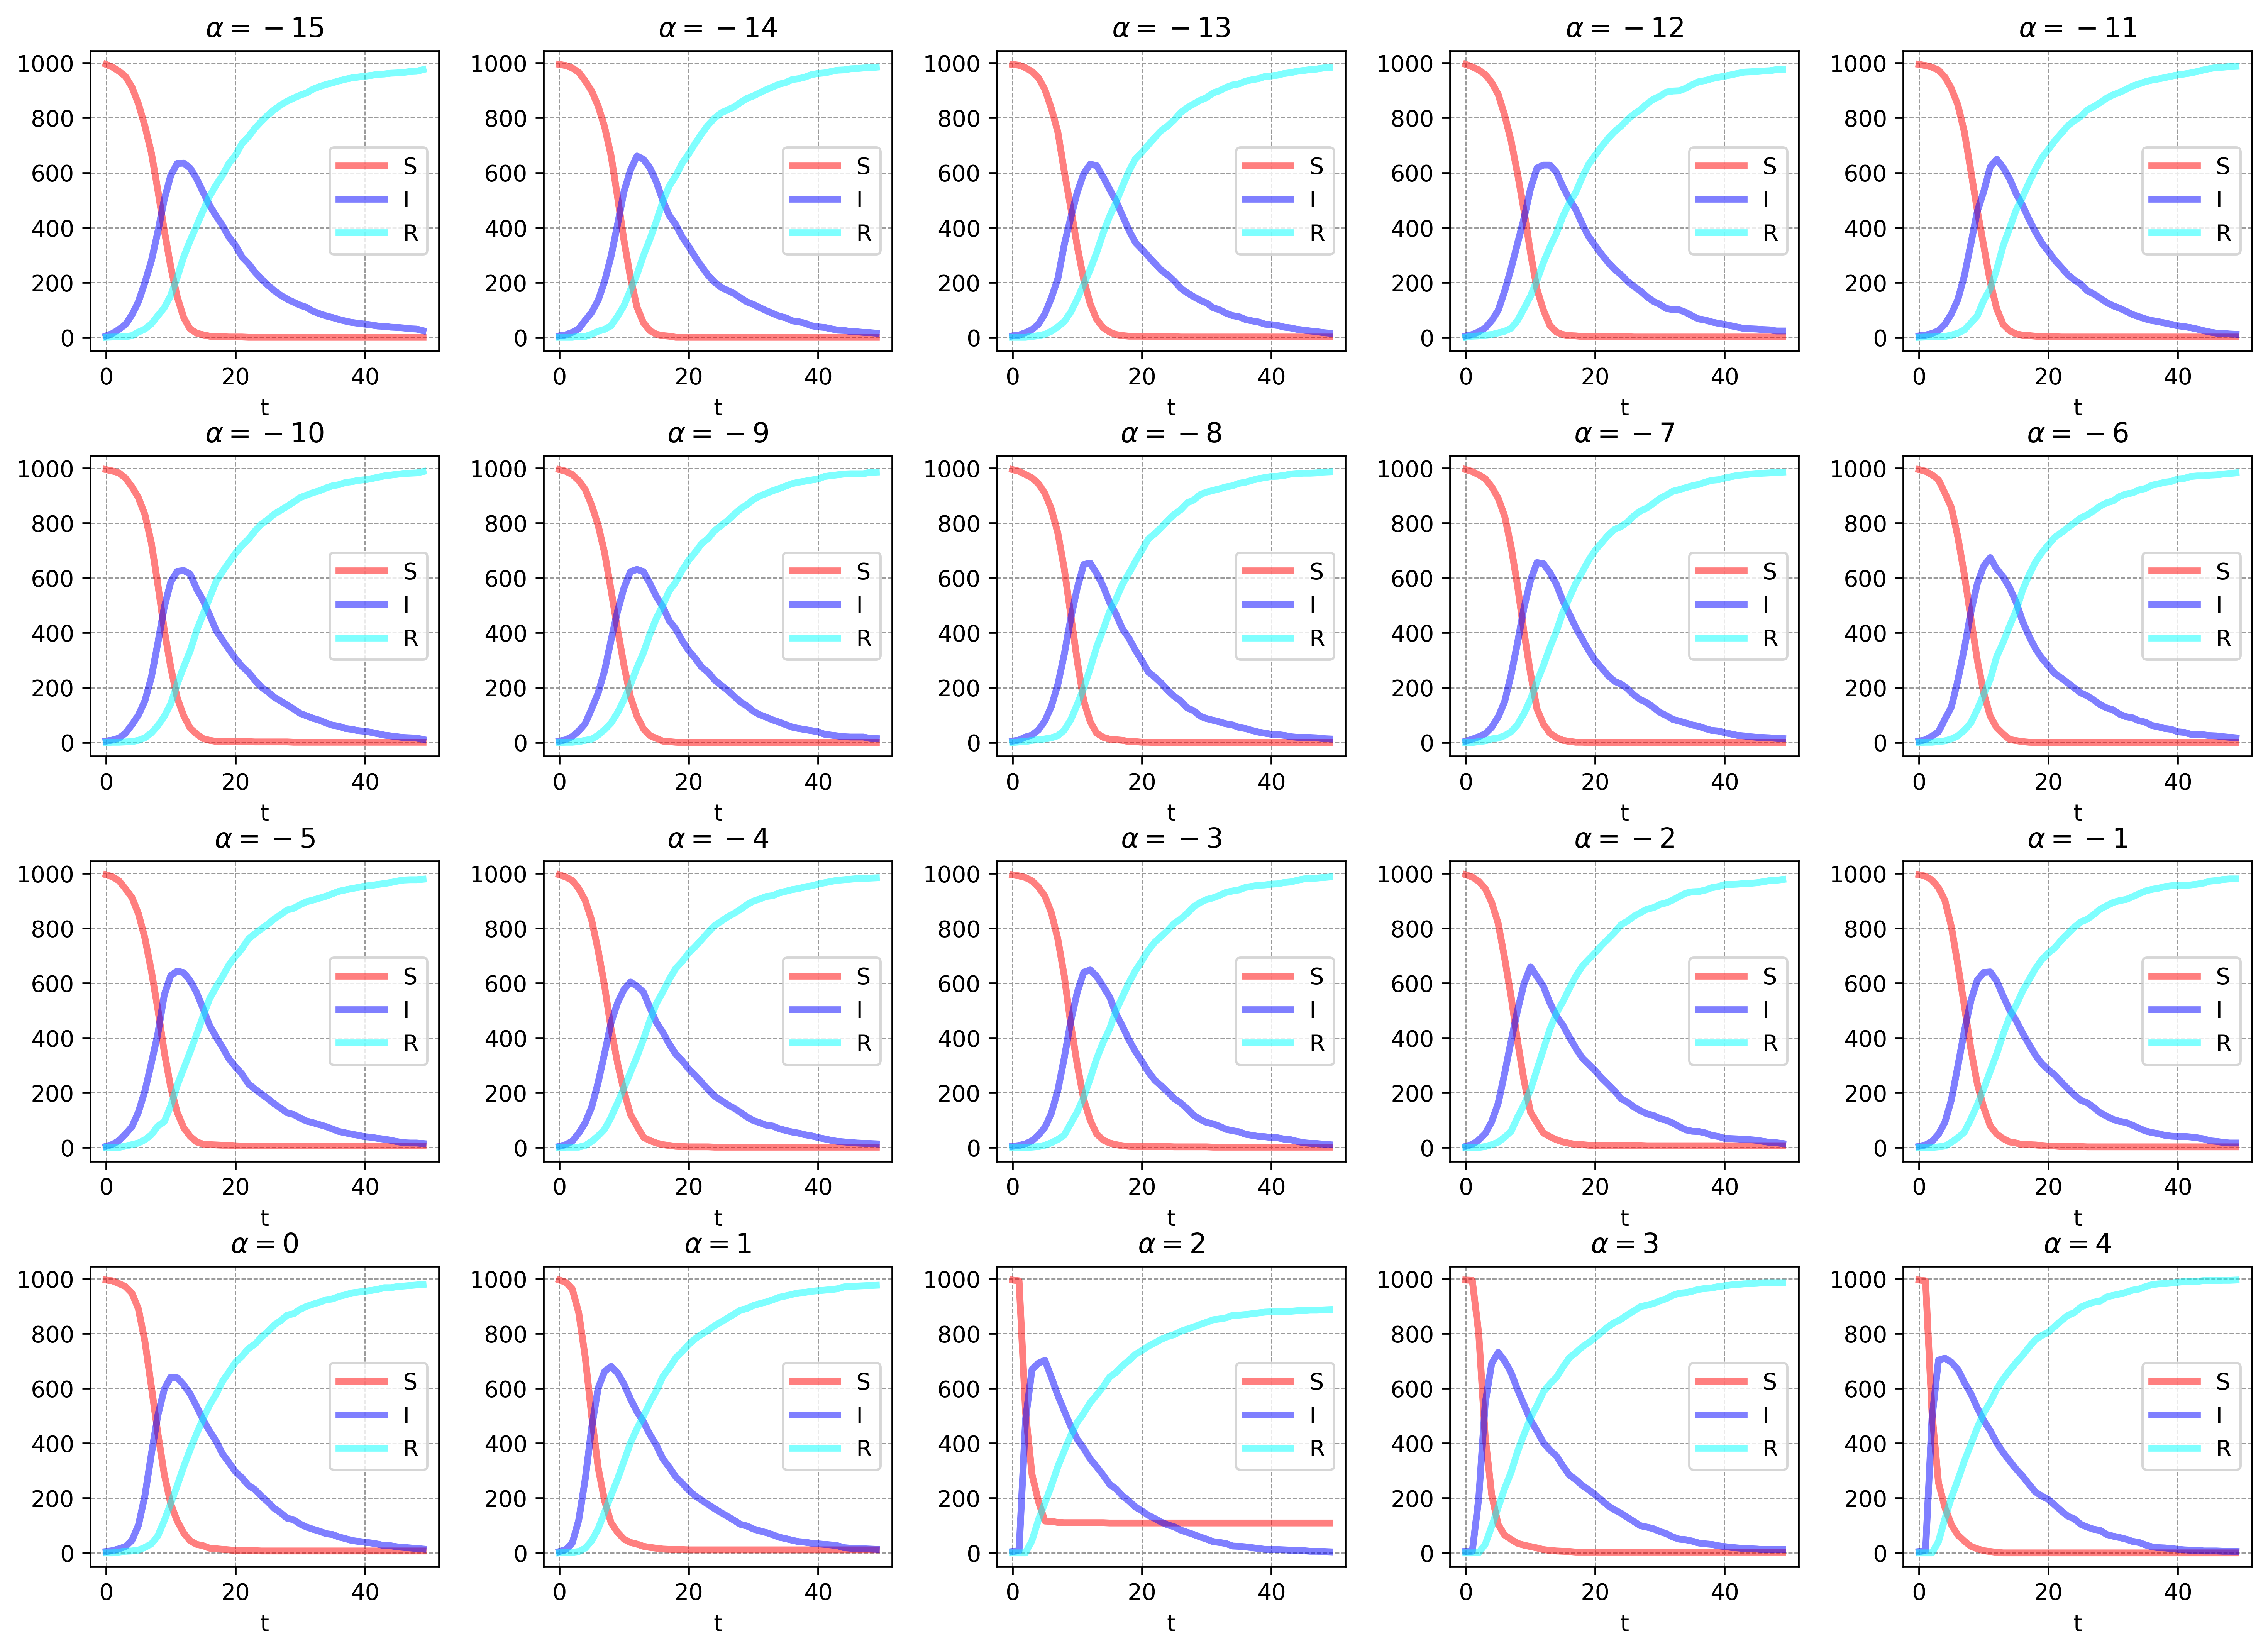

In [57]:
# transmissions = {\
#                 'S' : ('I', 'contagion', 'beta'), \
#                 'I' : ('R', 'spontaneous', 'mu') \
#                 }
# params = {\
#          'beta': 0.2,\
#           'mu' : 0.1
#          }
# compartments = {'S':[],
#                 'I':[],
#                 'R':[]}
# seed_num = 5
# T = 50

fig, ax = plt.subplots(4,5, figsize=(17,12), dpi=425)
ax = ax.flatten()
for i, a in enumerate(alphas):
    transmissions = {\
                'S' : ('I', 'contagion', 'beta'), \
                'I' : ('R', 'spontaneous', 'mu') \
                }
    params = {\
            'beta': 0.2,\
            'mu' : 0.1
            }
    compartments = {'S':[],
                    'I':[],
                    'R':[]}
    seed_num = 5
    T = 50
    epidemic_model_network(pa_graphs[i], compartments, seed_num, T, transmissions, params)
    ax[i].plot(range(T), compartments['S'], c="Red",linewidth = 3.0, alpha=0.5, label = 'S') 
    ax[i].plot(range(T), compartments['I'], c="Blue",linewidth = 3.0, alpha=0.5, label = 'I')
    ax[i].plot(range(T), compartments['R'], c="Cyan",linewidth = 3.0, alpha=0.5, label = 'R')
    ax[i].set_xlabel('t')
    ax[i].set_title(fr'$\alpha = {a}$')
    ax[i].legend()
    ax[i].grid(color='#999999', linestyle='--', linewidth=0.5)
    # ax[i].show() 
plt.subplots_adjust(wspace=0.3, hspace=0.35)

In [63]:
np.arange(-15, 5, 1)

array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
        -2,  -1,   0,   1,   2,   3,   4])

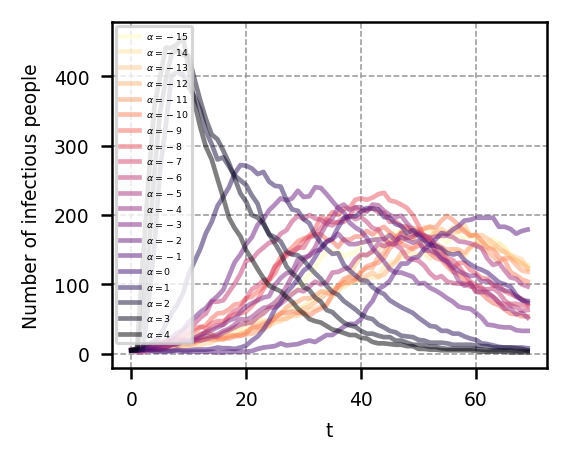

In [103]:
alphas = np.arange(-15, 5, 1)

fig, ax = plt.subplots(1,1, figsize=(2.5,2),dpi=225)
# Normalize values
norm = plt.Normalize(vmin=alphas.min(), vmax=alphas.max())

# Apply colormap
colors = plt.cm.magma_r(norm(alphas))

for i, a in enumerate(alphas):
    transmissions = {\
                'S' : ('I', 'contagion', 'beta'), \
                'I' : ('R', 'spontaneous', 'mu') \
                }
    params = {\
            'beta': 0.05,\
            'mu' : 0.1
            }
    compartments = {'S':[],
                    'I':[],
                    'R':[]}
    seed_num = 5
    T = 70
    
    epidemic_model_network(pa_graphs[i], compartments, seed_num, T, transmissions, params)
    ax.plot(range(T), compartments['I'], c= colors[i],linewidth = 1.5, alpha=0.5, label = fr'$\alpha = {a}$')
ax.set_xlabel('t', fontsize = 6)  
ax.set_ylabel('Number of infectious people', fontsize = 6)
ax.legend(fontsize=3)
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', labelsize=6)

    


In [119]:
1000/60

16.666666666666668

In [137]:
alphas = np.arange(-15, 5, 1)

# Normalize values
norm = plt.Normalize(vmin=alphas.min(), vmax=alphas.max())

# Apply colormap
colors = plt.cm.magma_r(norm(alphas))

time_to_peak = {a:[] for a in alphas}   
peak_size = {a:[] for a in alphas}
final_size = {a:[] for a in alphas}

for _ in range(1000):
    for i, a in enumerate(alphas):
        transmissions = {\
                    'S' : ('I', 'contagion', 'beta'), \
                    'I' : ('R', 'spontaneous', 'mu') \
                    }
        params = {\
                'beta': 0.05,\
                'mu' : 0.1
                }
        compartments = {'S':[],
                        'I':[],
                        'R':[]}
        seed_num = 10
        T = 100
        
        epidemic_model_network(pa_graphs[i], compartments, seed_num, T, transmissions, params)
        time_to_peak[a].append(np.argmax(compartments['I']))
        peak_size[a].append(max(compartments['I']))
        final_size[a].append(compartments['R'][-1])

    


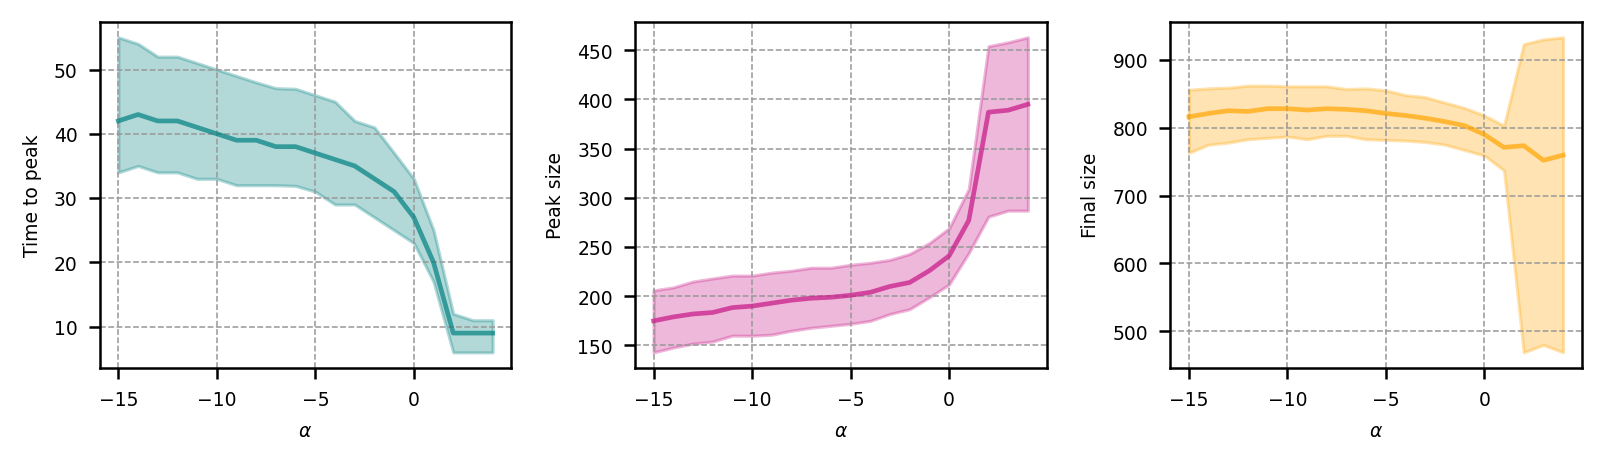

In [142]:
fig, ax = plt.subplots(1,3, figsize=(8.5,2),dpi=225)
mean = [np.mean(time_to_peak[a]) for a in alphas]
median = [np.quantile(time_to_peak[a], 0.5) for a in alphas]
lower = [np.quantile(time_to_peak[a], 0.1) for a in alphas]
upper = [np.quantile(time_to_peak[a], 0.9) for a in alphas]
ax[0].plot(alphas, median, c= 'teal',linewidth = 1.5, alpha=0.7)
ax[0].fill_between(alphas, lower, upper, color='teal', alpha=0.3, label='Error range')

ax[0].set_xlabel(r'$\alpha$', fontsize = 6)  
ax[0].set_ylabel('Time to peak', fontsize = 6)
# ax.legend(fontsize=3)
ax[0].grid(color='#999999', linestyle='--', linewidth=0.5)
ax[0].tick_params(axis='both', labelsize=6)

mean = [np.mean(peak_size[a]) for a in alphas]
median = [np.quantile(peak_size[a], 0.5) for a in alphas]
lower = [np.quantile(peak_size[a], 0.1) for a in alphas]
upper = [np.quantile(peak_size[a], 0.9) for a in alphas]
ax[1].plot(alphas, median, c= 'mediumvioletred', linewidth = 1.5, alpha=0.7)
ax[1].fill_between(alphas, lower, upper, color='mediumvioletred', alpha=0.3, label='Error range')

ax[1].set_xlabel(r'$\alpha$', fontsize = 6)  
ax[1].set_ylabel('Peak size', fontsize = 6)
# ax.legend(fontsize=3)
ax[1].grid(color='#999999', linestyle='--', linewidth=0.5)
ax[1].tick_params(axis='both', labelsize=6)

mean = [np.mean(final_size[a]) for a in alphas]
median = [np.quantile(final_size[a], 0.5) for a in alphas]
lower = [np.quantile(final_size[a], 0.1) for a in alphas]
upper = [np.quantile(final_size[a], 0.9) for a in alphas]
ax[2].plot(alphas, median, c= 'orange', linewidth = 1.5, alpha=0.7)
ax[2].fill_between(alphas, lower, upper, color='orange', alpha=0.3, label='Error range')

ax[2].set_xlabel(r'$\alpha$', fontsize = 6)  
ax[2].set_ylabel('Final size', fontsize = 6)
# ax.legend(fontsize=3)
ax[2].grid(color='#999999', linestyle='--', linewidth=0.5)
ax[2].tick_params(axis='both', labelsize=6)

plt.subplots_adjust(wspace=0.3)

In [ ]:
import pickle
# with open('time_to_peak.pkl', 'wb') as f:
#     pickle.dump(time_to_peak, f)

# with open('peak_size.pkl', 'wb') as f:
#     pickle.dump(peak_size, f)

# with open('final_size.pkl', 'wb') as f:
#     pickle.dump(final_size, f)

with open('data/time_to_peak.pkl', 'rb') as f:
    time_to_peak = pickle.load(f)

with open('data/peak_size.pkl', 'rb') as f:
    peak_size = pickle.load(f)

with open('data/final_size.pkl', 'rb') as f:
    final_size = pickle.load(f)